In [45]:
import pandas as pd

water = pd.read_csv("Water.tsv", sep="\t")

neighborhoods = water['neighborhood'].drop_duplicates()

## assigns values to different types of features
feature_values = {
    "Spray": 3,
    "Drinking Fountain": 2,
    "Decorative": 1
}
water['feature_value'] = water['feature_type'].map(feature_values)

# assigns values to different control types
control_values = {
    "Continuous": 2,
    "On/Off": 1
}
water['control_value'] = water['control_type'].map(control_values).fillna(0).astype(int)

#organizes the different scores
neighborhood_scores = water.groupby('neighborhood')[['feature_value', 'control_value']].sum()
neighborhood_scores['total_score'] = neighborhood_scores['feature_value'] + neighborhood_scores['control_value']


#sorts values highest to lowest
sorted_neighborhoods = neighborhood_scores.sort_values(by='total_score', ascending=False)

pd.set_option('display.max_rows', None)
print(sorted_neighborhoods)

                           feature_value  control_value  total_score
neighborhood                                                        
Squirrel Hill South                   26             18           44
Highland Park                         23             15           38
Bloomfield                            17             10           27
Brookline                             17             10           27
Allegheny Center                      15             11           26
Terrace Village                       17              9           26
Perry North                           14              9           23
Spring Hill-City View                 14              9           23
Carrick                               12              8           20
Brighton Heights                      12              8           20
South Side Flats                      12              7           19
Mount Washington                      12              7           19
Troy Hill                         

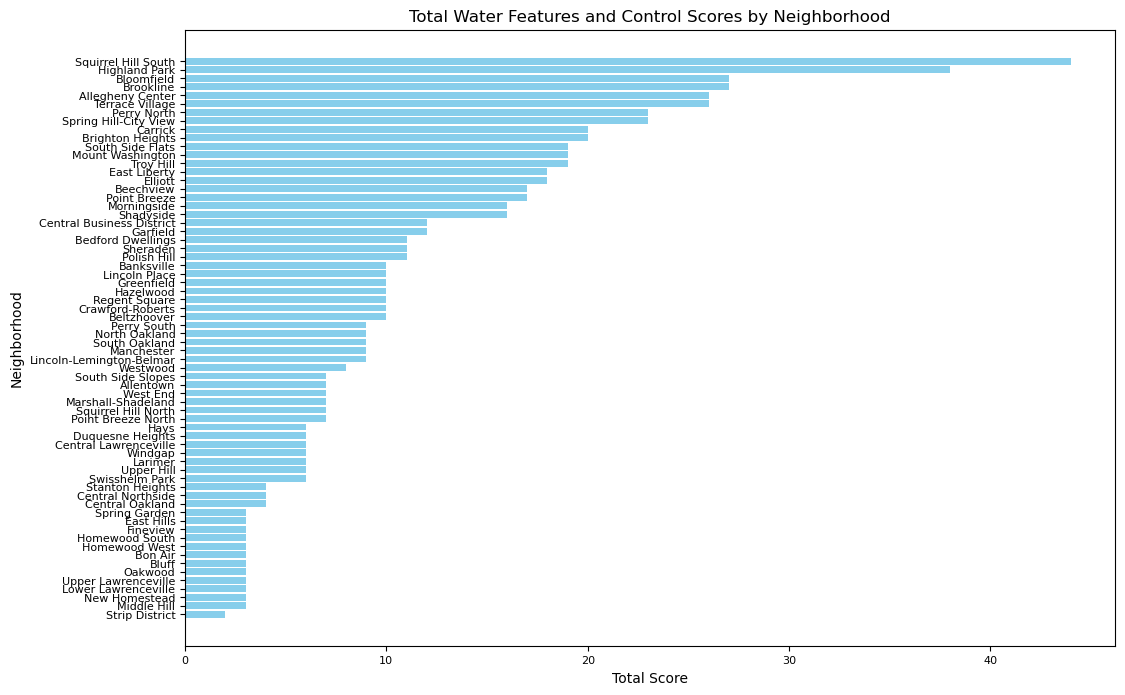

In [75]:
import matplotlib.pyplot as plt

# total score
plt.figure(figsize=(12, 8))
plt.barh(sorted_neighborhoods.index, sorted_neighborhoods['total_score'], color='skyblue')

# labels
plt.xlabel('Total Score', fontsize=10)  # Smaller font size for x-axis label
plt.ylabel('Neighborhood', fontsize=10)  # Smaller font size for y-axis label
plt.title('Total Water Features and Control Scores by Neighborhood', fontsize=12)  # Smaller font size for title

# font size
plt.tick_params(axis='both', labelsize=8)


# highest score up top
plt.gca().invert_yaxis()

plt.show()
